In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade tensorflow


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [ ]:
from tensorflow import keras



In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.14  # Replace with the desired compatible version


Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.14.0
  Using cached tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.8 MB)


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install opencv-python

In [ ]:
import os
import cv2
import shutil

In [ ]:
pip install opencv-python tqdm


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
!pip install pathlib

In [ ]:
import os, shutil, pathlib

In [ ]:
import os
import cv2
import numpy as np

def load_images_and_labels(folder_path):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Resize or preprocess the image as needed
            # img = cv2.resize(img, (width, height))

            label = int(filename.startswith("fake"))  # Assuming "fake" corresponds to label 0, adjust accordingly
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Example usage
train_folder = "/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/train"
X_train, y_train = load_images_and_labels(train_folder)

# Now you have X_train (images) and y_train (labels) ready to use


In [ ]:
X_train.shape

(1999, 224, 224, 3)

In [ ]:
y_train.shape

(1999,)

In [ ]:
# Example usage
val_folder = "/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/val"
X_val, y_val = load_images_and_labels(val_folder)


In [ ]:
X_val.shape

(810, 224, 224, 3)

In [ ]:
y_val.shape

(810,)

In [ ]:
test_folder = "/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/test"
X_test, y_test = load_images_and_labels(test_folder)


In [ ]:
X_test.shape

(819, 224, 224, 3)

In [ ]:
y_test.shape

(819,)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

## Generating data or images during runtime for training purpose.DO not do it for testing
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [ ]:
X_train.shape

(1999, 224, 224, 3)

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Assume X_train, y_train, X_val, y_val are your training and validation data

# Define your model as a function
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Wrap your model with KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.4, 0.6]
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_learning_rate = grid_result.best_params_['learning_rate']
best_dropout_rate = grid_result.best_params_['dropout_rate']

# Train the final model with the best hyperparameters
final_model = create_model(learning_rate=best_learning_rate, dropout_rate=best_dropout_rate)
final_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

# Make predictions on test data
y_pred = final_model.predict_classes(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define constants
input_shape = (224, 224, 3)  # Input shape expected by VGG16
num_classes = 1  # Binary classification

In [ ]:

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the VGG16 base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(num_classes, activation='sigmoid'))  # Output layer for binary classification


# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary to review the architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Train the model and collect the history
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))


Epoch 1/30
63/63 [==============================] - 28s 269ms/step - loss: 0.6484 - accuracy: 0.9800 - val_loss: 0.0306 - val_accuracy: 0.9988
Epoch 2/30
63/63 [==============================] - 10s 162ms/step - loss: 0.2281 - accuracy: 0.9965 - val_loss: 6.7905e-06 - val_accuracy: 1.0000
Epoch 3/30
63/63 [==============================] - 10s 163ms/step - loss: 0.1045 - accuracy: 0.9950 - val_loss: 0.0203 - val_accuracy: 0.9988
Epoch 4/30
63/63 [==============================] - 10s 164ms/step - loss: 0.1439 - accuracy: 0.9980 - val_loss: 0.0667 - val_accuracy: 0.9975
Epoch 5/30
63/63 [==============================] - 10s 165ms/step - loss: 0.1725 - accuracy: 0.9970 - val_loss: 0.0297 - val_accuracy: 0.9988
Epoch 6/30
63/63 [==============================] - 10s 167ms/step - loss: 0.0489 - accuracy: 0.9985 - val_loss: 0.1967 - val_accuracy: 0.9914
Epoch 7/30
63/63 [==============================] - 11s 168ms/step - loss: 0.1240 - accuracy: 0.9965 - val_loss: 0.7633 - val_accuracy: 0.

In [ ]:
# Save the trained model
model1 = model.save('vgg16_real_fake_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


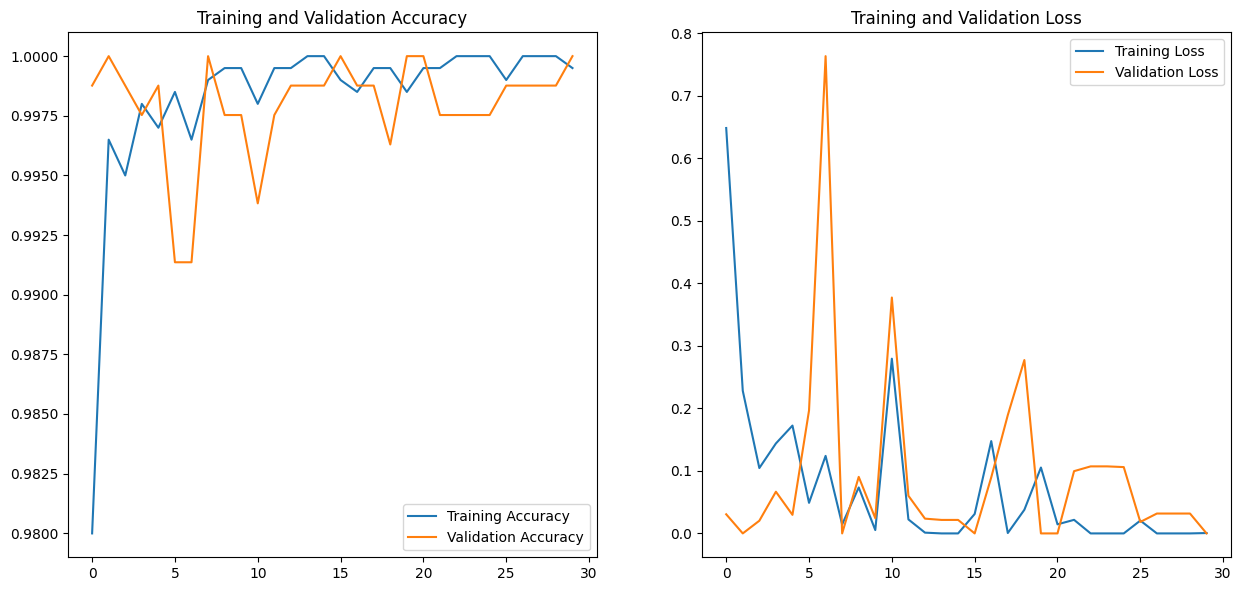

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import cv2
import numpy as np

# Load and preprocess the new image
img_path = '/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/test/Real1781.jpg'  # Update with the path to your new image


In [ ]:
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))  # Assuming the model was trained with input size (224, 224)
img = img / 255.0  # Normalize pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension


In [ ]:
predictions = model.predict(img)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[0.]]


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
# Load the trained model
model = load_model('vgg16_real_fake_classifier.h5')

In [ ]:

# Function to preprocess an image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Make predictions on a single image
def predict_single_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)

    # Assuming 0 represents 'fake' and 1 represents 'real'
    if prediction[0][0] >= 0.5:
        print("Prediction: Real")
    else:
        print("Prediction: Fake")




In [ ]:
# Example usage:
image_path = '/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/test/fake1436.jpg'
predict_single_image(image_path)

1/1 [==============================] - 0s 22ms/step
Prediction: Fake


In [ ]:
# Make predictions on a single image with confidence scores
def predict_single_image_with_confidence(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)

    # Assuming 0 represents 'fake' and 1 represents 'real'
    class_label = 1 if prediction[0][0] >= 0.5 else 0
    confidence_score = prediction[0][0]

    print(f"Prediction: Class {class_label} with Confidence: {confidence_score:.4f}")

# Example usage:
image_path = '/content/drive/MyDrive/deep_fake_image_detection/Image_segregated_2/test/fake1436.jpg'
predict_single_image_with_confidence(image_path)


1/1 [==============================] - 0s 19ms/step
Prediction: Class 0 with Confidence: 0.0000
